<a href="https://colab.research.google.com/github/Osas1790/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection

##### Importing all the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import pyforest
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, StandardScaler, PowerTransformer, MinMaxScaler, LabelEncoder, RobustScaler
from sklearn.model_selection import RepeatedStratifiedKFold, KFold, cross_val_predict, train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostClassifier
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression
from xgboost import XGBRegressor, XGBClassifier
from xgboost import plot_importance
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)

## Reading the data

In [ ]:
df = pd.read_csv("creditcard.csv")

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


### PERFORMING Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# checking for duplicates
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 284807, dtype: bool

##  Data preproccessing

In [ ]:
#df = df.drop('Time', axis=1)

In [ ]:
#df

## Data Visualization

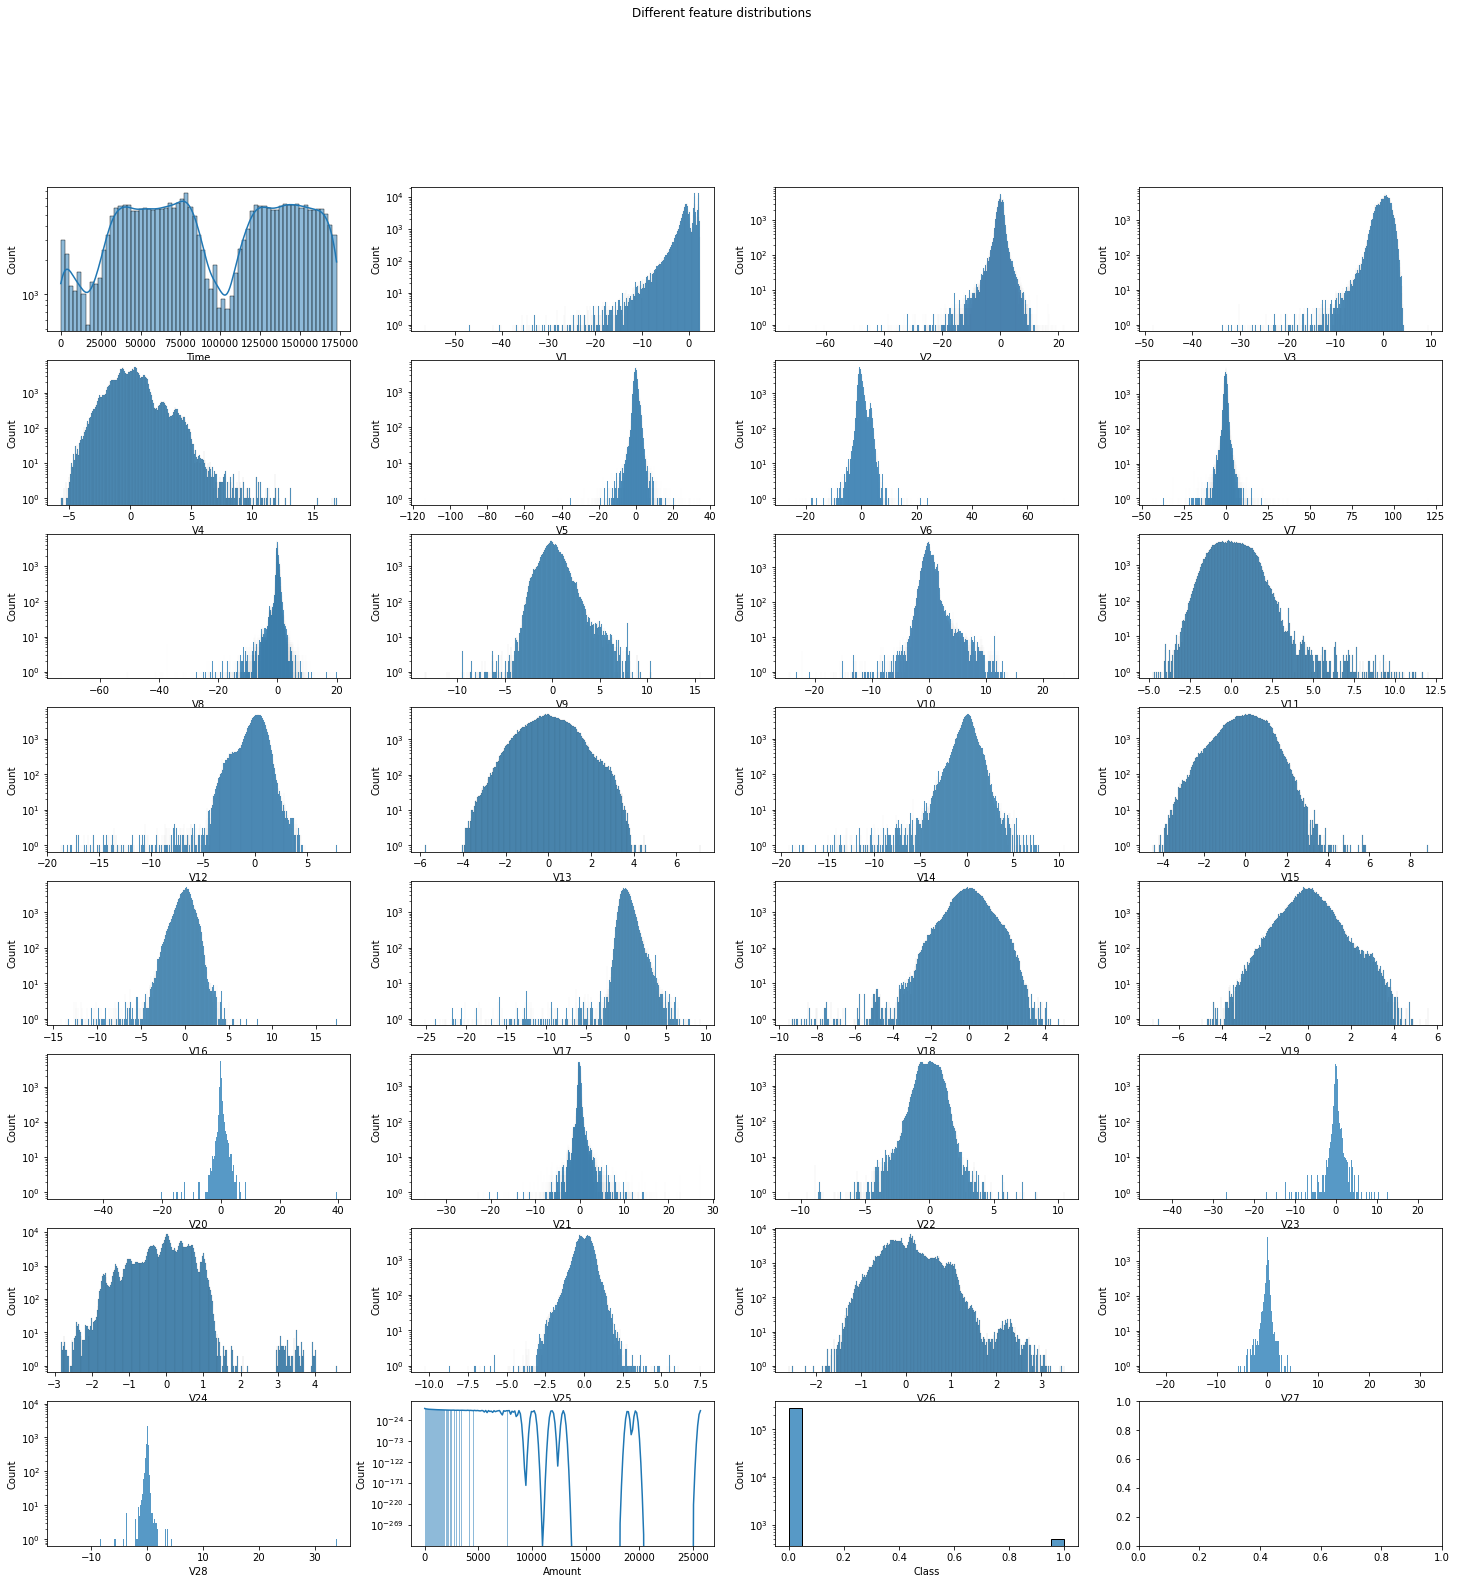

In [ ]:
fig, axes = plt.subplots(8, 4, figsize=(25, 25))
fig.suptitle('Different feature distributions')

axes = axes.reshape(32,)

for i,column in enumerate(df.columns):
    kde_status = False
    axes[i].set_yscale('log')
    
    if column == "Time" or column == "Amount":
        kde_status = True
        
    sns.histplot(ax = axes[i],data = df, x= column,kde=kde_status)

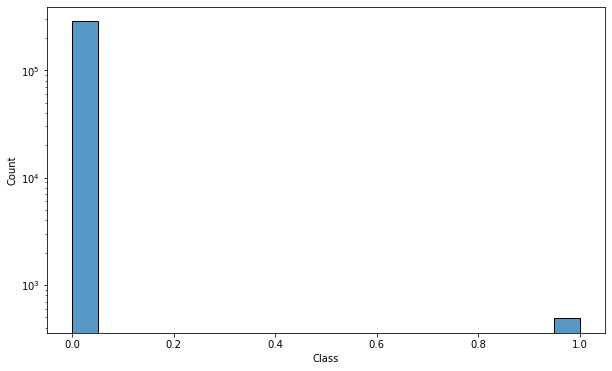

In [ ]:
plot = sns.histplot(data = df , x = "Class")
plot.set(yscale="log")
print()

Data is heavily imbalanced with respect to target variable - Class.

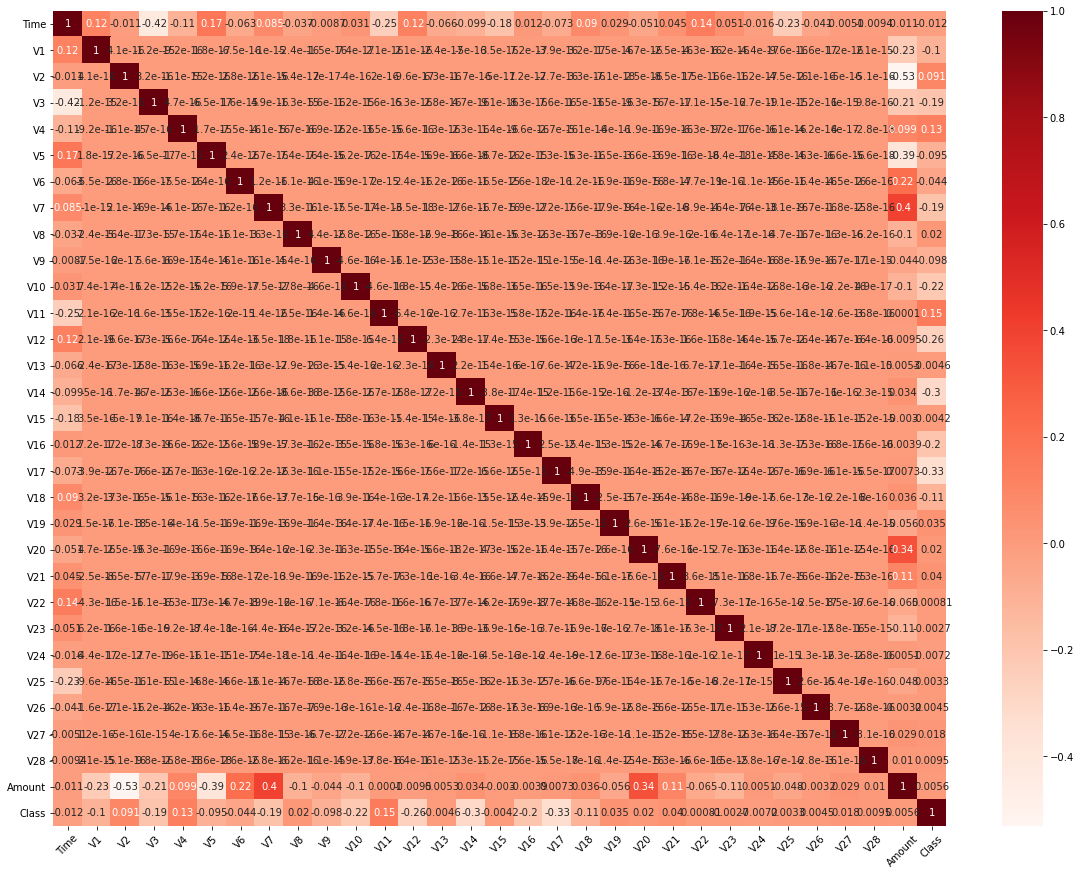

In [ ]:
# Using pearson correlation

plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, cmap = plt.cm.Reds)
plt.xticks(rotation=45);

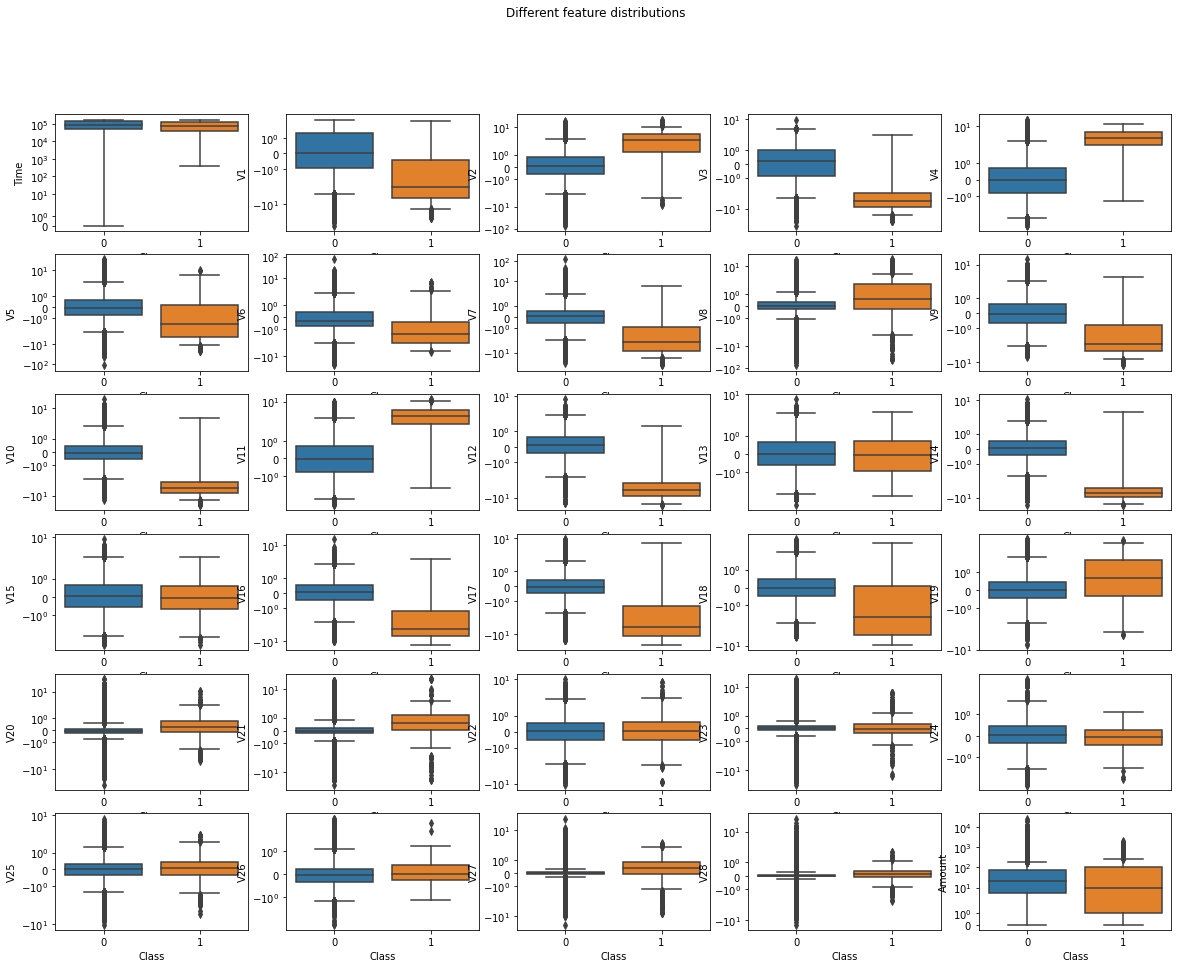

In [ ]:
fig, axes = plt.subplots(6, 5, figsize=(20, 15))
fig.suptitle('Different feature distributions')

axes = axes.reshape(30,)

for i,column in enumerate(df.columns[:-1]):
    axes[i].set_yscale('symlog')
    sns.boxplot(ax = axes[i],x="Class", y=column,data=df)

## Data  Modeling

##### Scaling Time and Amount

In [ ]:
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *

from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.utils import shuffle
from IPython.display import clear_output
from sklearn.decomposition import PCA
import plotly.express as px

In [ ]:
transformer = RobustScaler()

df['Amount'] = transformer.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time']   = transformer.fit_transform(df['Time'].values.reshape(-1,1))

### Dealing with imbalanced data

In [ ]:
X = np.array(df.drop(columns = ['Class']))
y = np.array(df['Class'])

In [ ]:
X , y = shuffle(X,y,random_state = 0)

In [ ]:
over_X , over_y = SMOTE().fit_resample(X, y)
over_X , over_y = shuffle(over_X,over_y,random_state = 0)

In [ ]:
under_X , under_y = RandomUnderSampler(random_state=0).fit_resample(X,y)
under_X , under_y = shuffle(under_X,under_y,random_state = 0)

## Modeling Building

In [ ]:
model1 = LogisticRegression(solver='liblinear')
model2 = DecisionTreeClassifier()
model3 = SVC()

In [ ]:
def build_classifier():
    model = Sequential()

    model.add(Dense(units = 32,kernel_initializer="uniform",activation="relu",input_shape = (30,)))
    model.add(Dense(units = 64,kernel_initializer="uniform",activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(units = 32,kernel_initializer="uniform",activation="relu"))
    model.add(Dense(units = 1,kernel_initializer="uniform",activation="sigmoid"))
    
    model.compile(optimizer = "adam",loss="binary_crossentropy",metrics=['Recall'])

    return model

In [ ]:
classifier = KerasClassifier(build_fn=build_classifier,batch_size = 256,epochs = 10)
classifier

## Testing / Cross validation

In [ ]:
scores = cross_val_score(estimator=model1,X=over_X,y=over_y,cv=5,scoring="f1")
print("Logistic Regression cross validation score : " , np.round(scores.mean()*100,3),"%")
scores = cross_val_score(estimator=model2,X=over_X,y=over_y,cv=5,scoring="f1")
print("Decision Tree cross validation score : " , np.round(scores.mean()*100,3),"%")

Logistic Regression cross validation score :  94.646 %
Decision Tree cross validation score :  99.81 %


In [ ]:
scores = cross_val_score(estimator=classifier,X=over_X,y=over_y,cv=5,scoring="f1",n_jobs = 1)

clear_output()

In [ ]:
print("ANN cross validation score : " , np.round(scores.mean()*100,3),"%")
# ANN - Artificial Neural Networks

ANN cross validation score :  99.871 %


##### Undersampled data 

In [ ]:
scores = cross_val_score(estimator=model1,X=under_X,y=under_y,cv=5,scoring="f1")
print("Logistic Regression cross validation score : " , np.round(scores.mean()*100,3),"%")
scores = cross_val_score(estimator=model2,X=under_X,y=under_y,cv=5,scoring="f1")
print("Decision Tree cross validation score : " , np.round(scores.mean()*100,3),"%")
scores = cross_val_score(estimator=RandomForestClassifier(max_depth=35),X=under_X,y=under_y,cv=5,scoring="f1")
print("Random Forest cross validation score : " , np.round(scores.mean()*100,3),"%")
scores = cross_val_score(estimator=model3,X=under_X,y=under_y,cv=5,scoring="f1")
print("SVC cross validation score : " , np.round(scores.mean()*100,3),"%")

Logistic Regression cross validation score :  94.573 %
Decision Tree cross validation score :  91.545 %
Random Forest cross validation score :  93.577 %
SVC cross validation score :  93.088 %


In [ ]:
classifier = KerasClassifier(build_fn=build_classifier,batch_size = 1,epochs = 20)
scores = cross_val_score(estimator=classifier,X=under_X,y=under_y,cv=5,scoring="f1")

#clear_output()

Epoch 1/20
787/787 [==============================] - 1s 409us/step - loss: 0.2585 - recall: 0.8964
Epoch 2/20
787/787 [==============================] - 0s 415us/step - loss: 0.1514 - recall: 0.9352
Epoch 3/20
787/787 [==============================] - 0s 419us/step - loss: 0.1202 - recall: 0.9482
Epoch 4/20
787/787 [==============================] - 0s 422us/step - loss: 0.1169 - recall: 0.9482
Epoch 5/20
787/787 [==============================] - 0s 434us/step - loss: 0.1061 - recall: 0.9482
Epoch 6/20
787/787 [==============================] - 0s 430us/step - loss: 0.0999 - recall: 0.9585
Epoch 7/20
787/787 [==============================] - 0s 419us/step - loss: 0.0880 - recall: 0.9637
Epoch 8/20
787/787 [==============================] - 0s 420us/step - loss: 0.0802 - recall: 0.9663
Epoch 9/20
787/787 [==============================] - 0s 426us/step - loss: 0.0696 - recall: 0.9715
Epoch 10/20
787/787 [==============================] - 0s 424us/step - loss: 0.0825 - recall: 0.9663

In [ ]:
print("ANN cross validation score : " , np.round(scores.mean()*100,3),"%")

ANN cross validation score :  92.99 %


### Train/Test split

In [ ]:
xtr, xte, ytr, yte = train_test_split(X, y, test_size = 0.25 , shuffle = True)

<IPython.core.display.Javascript object>

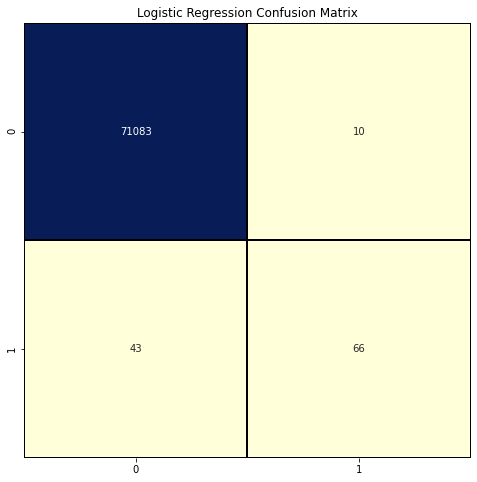

In [ ]:
model1.fit(xtr,ytr)


predictions = model1.predict(xte)
conf_matrix = metrics.confusion_matrix(yte, predictions)

plt.figure(figsize=(8,8))
ax = plt.axes()
sns.heatmap(conf_matrix,annot=True,fmt='g',cbar=False,axes=ax,cmap ="YlGnBu",linewidths=1,linecolor='black')
ax.set_title('Logistic Regression Confusion Matrix')

plt.show()

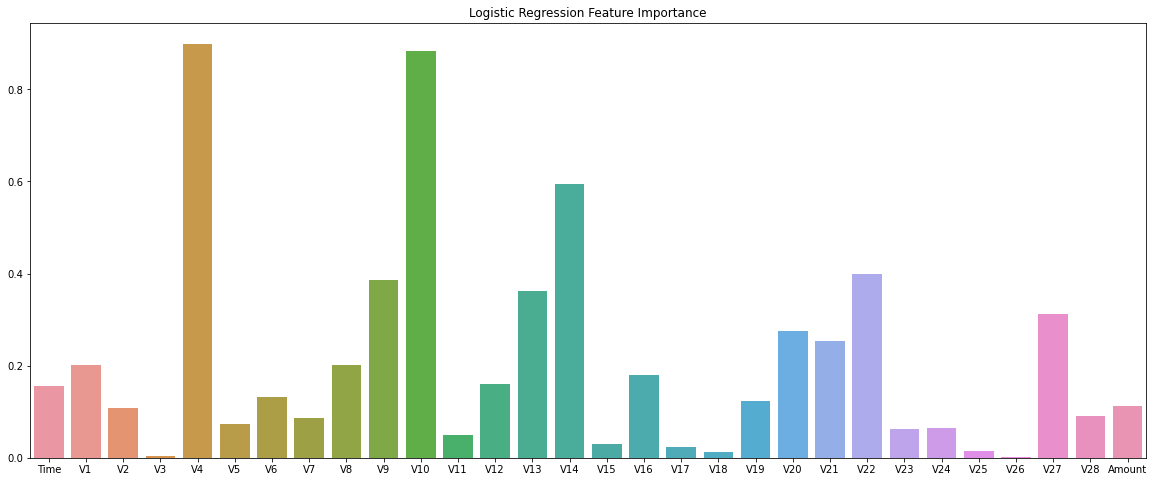

In [ ]:
plt.figure(figsize=(20,8))
ax = plt.axes()
ax.set_title('Logistic Regression Feature Importance')

plot = sns.barplot(x = df.columns[:-1] , y =np.abs((np.std(xtr, 0) *  model1.coef_).reshape(30,)),axes = ax)

<IPython.core.display.Javascript object>

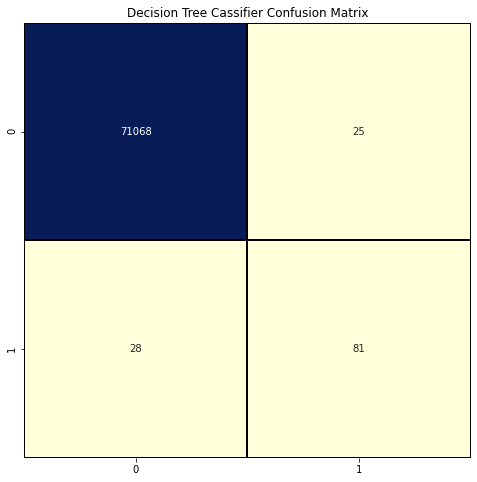

In [ ]:
model2.fit(xtr,ytr)


predictions = model2.predict(xte)
conf_matrix = metrics.confusion_matrix(yte, predictions)

plt.figure(figsize=(8,8))
ax = plt.axes()
sns.heatmap(conf_matrix,annot=True,fmt='g',cbar=False,axes=ax,cmap ="YlGnBu",linewidths=1,linecolor='black')
ax.set_title('Decision Tree Cassifier Confusion Matrix')

plt.show()

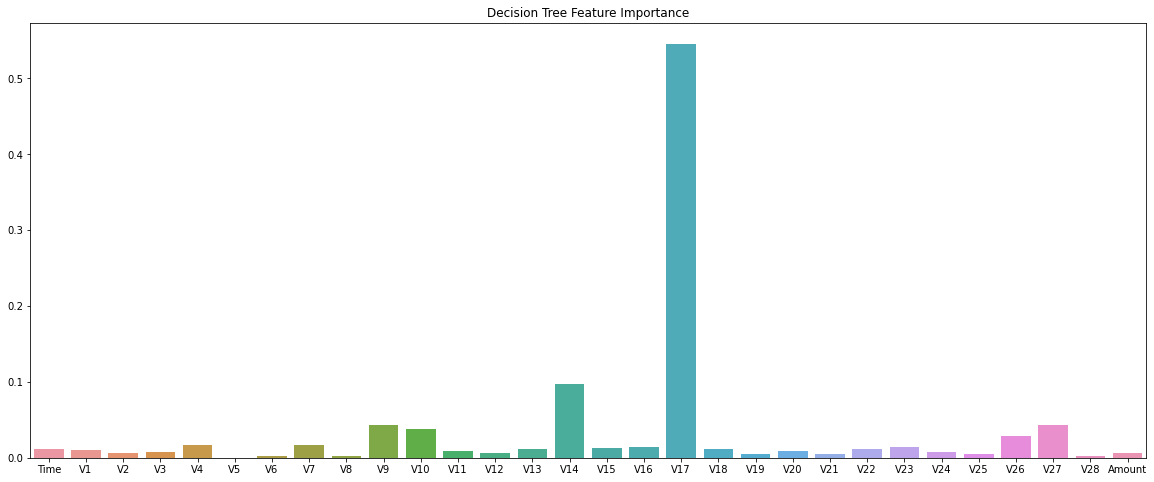

In [ ]:
plt.figure(figsize=(20,8))
ax = plt.axes()
ax.set_title('Decision Tree Feature Importance')

plot = sns.barplot(x = df.columns[:-1] , y = model2.feature_importances_,axes = ax)


<IPython.core.display.Javascript object>

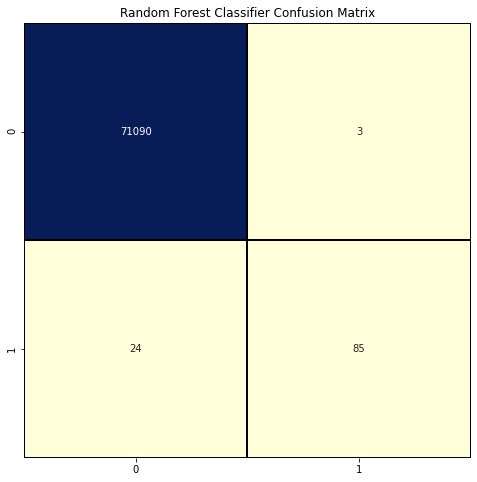

In [ ]:
model4 = RandomForestClassifier(max_depth = 35)
model4.fit(xtr,ytr)


predictions = model4.predict(xte)
conf_matrix = metrics.confusion_matrix(yte, predictions)

plt.figure(figsize=(8,8))
ax = plt.axes()
sns.heatmap(conf_matrix,annot=True,fmt='g',cbar=False,axes=ax,cmap ="YlGnBu",linewidths=1,linecolor='black')
ax.set_title('Random Forest Classifier Confusion Matrix')

plt.show()

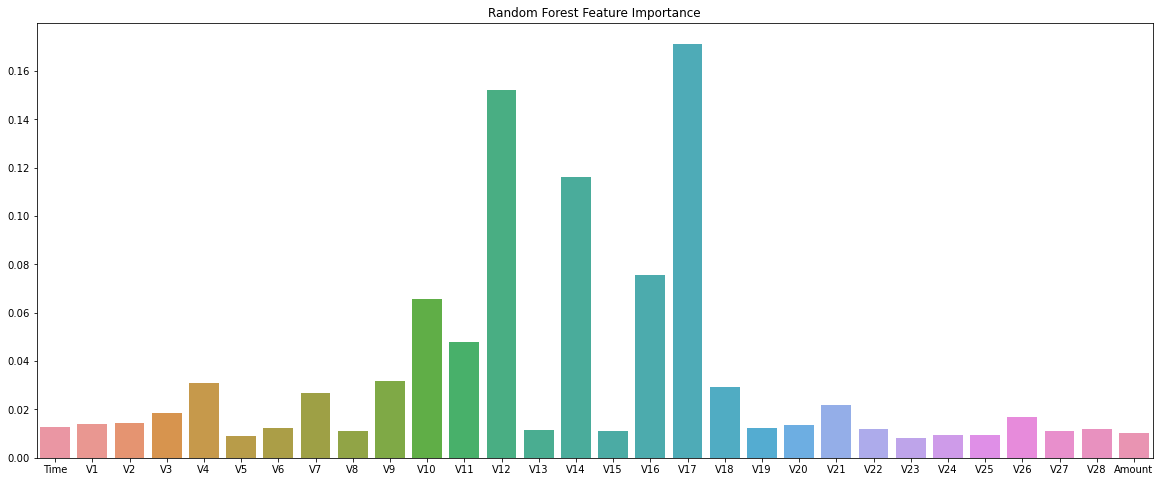

In [ ]:
plt.figure(figsize=(20,8))
ax = plt.axes()
ax.set_title('Random Forest Feature Importance')

plot = sns.barplot(x = df.columns[:-1] , y = model4.feature_importances_,axes = ax)

<IPython.core.display.Javascript object>

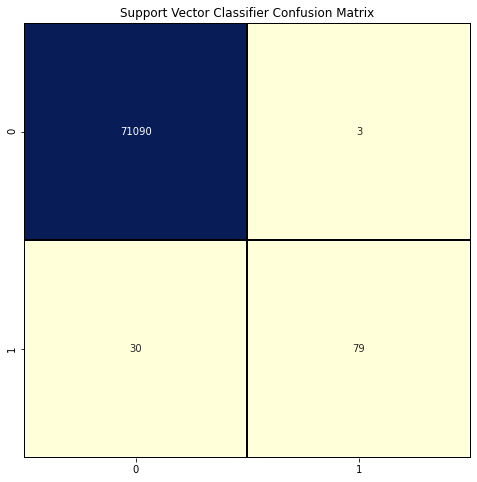

In [ ]:
model3.fit(xtr,ytr)


predictions = model3.predict(xte)
conf_matrix = metrics.confusion_matrix(yte, predictions)

plt.figure(figsize=(8,8))
ax = plt.axes()
sns.heatmap(conf_matrix,annot=True,fmt='g',cmap ="YlGnBu",cbar=False,axes=ax,linewidths=1,linecolor='black')
ax.set_title('Support Vector Classifier Confusion Matrix')

plt.show()

<IPython.core.display.Javascript object>

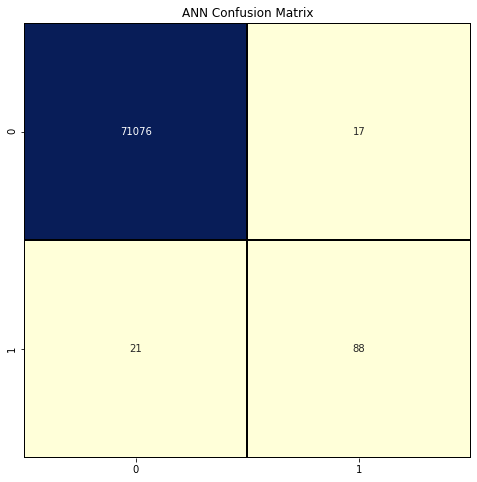

In [ ]:
model5 = build_classifier()

history = model5.fit(xtr,ytr,epochs=20,batch_size=256,shuffle=True)

clear_output()

predictions = (model5.predict(xte) > 0.5).astype('int32').reshape(xte.shape[0],)
conf_matrix = metrics.confusion_matrix(yte, predictions)

plt.figure(figsize=(8,8))
ax = plt.axes()
sns.heatmap(conf_matrix,annot=True,fmt='g',cbar=False,axes=ax,cmap ="YlGnBu",linewidths=1,linecolor='black')
ax.set_title('ANN Confusion Matrix')

plt.show()